# Twitter Sentiment Analysis

**The Project aims to analyse sentiments of around 1.6 million tweets data. Dataset "Sentiment 140 dataset" is taken from Kaggle for the sentiment analysis. In this I have first performed exploratory data analysis on dataset then use Natural Language Toolkit(NLTK) for data preprocessing and Term Frequency- Inverse Document Frequency (TF-IDF). The performance of these classifiers is then evaluated using accuracy and F1 Scores.**

### Target is to develope most suitable and accurate machine learning model.

### Importing Required Python libraries

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Loading dataset

In [2]:
# Importing the dataset
#DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING)
data.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Let's give header to dataset columns

In [3]:
data.columns = ['Target','ids','Date','Flag','User','Text']
data

,Target,ids,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Getting Dataset Shape

In [4]:
print("The shape of Data is : ",data.shape)

The shape of Data is :  (1599999, 6)


### Performing EDA on the dataset

In [5]:
# count of data
data.count()

Target    1599999
ids       1599999
Date      1599999
Flag      1599999
User      1599999
Text      1599999
dtype: int64

In [6]:
# Check data having missing values or not 
data.isnull().sum()

Target    0
ids       0
Date      0
Flag      0
User      0
Text      0
dtype: int64

In [7]:
# check info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### _Conclusion:_
**From this I get to know there are no missing values as well as 2 integer and 4 object datatype but date should be in datetime format so I will use pd.datetime().**

In [8]:
data['Date']=  pd.to_datetime(data['Date'], infer_datetime_format=True)

In [9]:
# again check info to see changes are done or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Target  1599999 non-null  int64         
 1   ids     1599999 non-null  int64         
 2   Date    1599999 non-null  datetime64[ns]
 3   Flag    1599999 non-null  object        
 4   User    1599999 non-null  object        
 5   Text    1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


In [10]:
# see final data after changes 
data.head()

,Target,ids,Date,Flag,User,Text
0,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### _Conclusion:_
**Date object is converted datetime format.**

In [11]:
# find most frequent user tweet
data["User"].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: User, Length: 659775, dtype: int64

### _Conclusion:_
**Here we can see that above 300 (lost_dog,webwoke,tweetpet) this user tweet most.**


In [12]:
# summary statastic of data
round(data[["Target"]].describe(),2)

,Target
count,1599999.0
mean,2.0
std,2.0
min,0.0
25%,0.0
50%,4.0
75%,4.0
max,4.0


### _Conclusion:_
**Target value 0 means "Negative tweet" and 4 means "Positive tweet."**

In [13]:
# count of target variable
data["Target"].value_counts()

4    800000
0    799999
Name: Target, dtype: int64

### lets set Target 4 as positive tweets and 0 as negative

In [14]:
# lets set Target 4 as positive tweets and 0 as negative
data["Target"] = data["Target"].replace(4,"Positive")
data["Target"] = data["Target"].replace(0,"Negative")

### Data Visualization

<Figure size 1440x720 with 0 Axes>

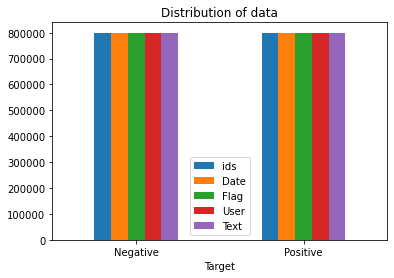

In [15]:
# Plotting the distribution for dataset.

#set figure size
fig = plt.figure(figsize = (20, 10))

ax = data.groupby("Target").count().plot(kind='bar', title='Distribution of data',
                                         legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(data['Text']), list(data["Target"])

### _Conclusion:_
**Distribution of Positive and Negative tweets is approximatey same.**

<AxesSubplot:xlabel='Target', ylabel='count'>

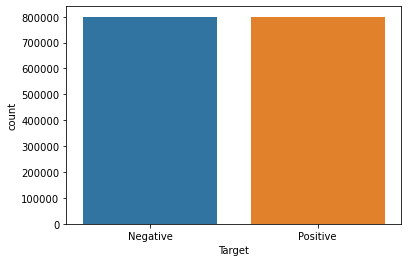

In [16]:
# count plot for target variable
import  seaborn as sns
sns.countplot(x='Target', data=data)

### _Conclusion:_
- **Again we got similar distribution of positive and negative tweets around target variable.**
- **I must say data is varient it constantly change last time output shows that most of the tweets are positive and now there are almost same number of negative tweets.**

### Plotting pie chart for Distribution of negative and positive Tweets

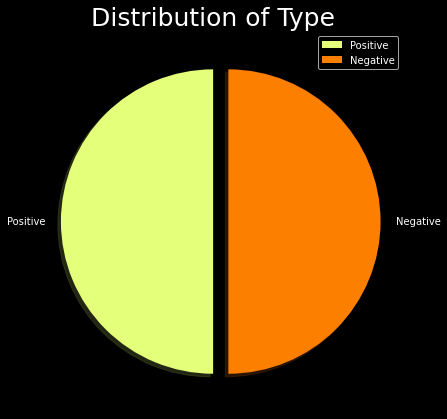

In [17]:
# plot pie for Distribution of negative and positive Tweets

plt.style.use("dark_background")
labels = ['Positive', 'Negative']
size = data['Target'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size,labels=labels, colors = colors, explode = explode, 
        shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

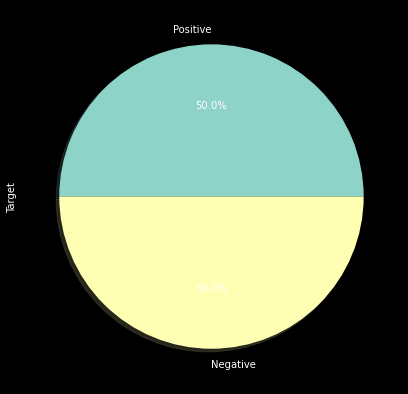

In [18]:
# plt.style.use("dark_background")
data['Target'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(7,7))
plt.show()

### Data preprocessing

In [19]:
# 5.1: Selecting the text and Target column for our further analysis
df  = data[["Text","Target"]]
df.head()

,Text,Target
0,is upset that he can't update his Facebook by ...,Negative
1,@Kenichan I dived many times for the ball. Man...,Negative
2,my whole body feels itchy and like its on fire,Negative
3,"@nationwideclass no, it's not behaving at all....",Negative
4,@Kwesidei not the whole crew,Negative


In [20]:
# 5.2: Separating positive and negative tweets

data_pos = df[df['Target'] == "Positive"]
data_neg = df[df['Target'] == "Negative"]

In [21]:
# 1 fourth part of dataset
# 1599999/4 == 399999.75

In [22]:
# 5.3 : Taking one-fourth of the data so we can run it on our machine easily

data_pos = data_pos.iloc[:int(399999)]
data_neg = data_neg.iloc[:int(399999)]

In [23]:
# 5.4 : Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])
dataset.head()

,Text,Target
799999,I LOVE @Health4UandPets u guys r the best!!,Positive
800000,im meeting up with one of my besties tonight! ...,Positive
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",Positive
800002,Being sick can be really cheap when it hurts t...,Positive
800003,@LovesBrooklyn2 he has that effect on everyone,Positive


### Steps included in Text Pre-processing:

- Step 1 -> Converting everything into lower or an upper cases.

- Step 2 -> Remove all the special characters (such as @, #, !, numbers).

- Step 3 -> Remove the stop words.

- Step 4 -> Remove URL's

- Step 5 -> Remove

In [24]:
# Step 5.6 - text pre-processing
dataset['Text'] = dataset['Text'].str.lower().str.replace('[^a-z\']', ' ') 

In [25]:
# Step 5.7 : Downloading stopwords
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
# Step 5.8 : Removing all the stopwords.
# Lets create a user defined function which will split the text into a list of words 
# and then match 
# the words with the words in stop_list, and give us the output after removing stopwords.
# Cleaning URL's
# removing numeric


def sw(x):
    x = [word for word in x.split() if word not in stop]  
    # Remove Stopwords
    return ' '.join (x)
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)  
    # Cleaning and removing URLs
    dataset['Text'] = dataset['Text'].apply(lambda x: sw(x))
    return re.sub('[0-9]+', '', data) 
    #Cleaning and removing numeric numbers
    dataset['Text'] = dataset['Text'].apply(lambda x: sw(x))

In [27]:
# Step 5.9  Applying our user defined function on text column and then storing result 
# in same column
dataset['Text'] = dataset['Text'].apply(sw)

In [28]:
# Lets check clean text
dataset["Text"][9]

'spring break plain city snowing'

In [29]:
# applying stemming

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data


In [30]:
dataset['Text']= dataset['Text'].apply(lambda x: stemming_on_text(x))

In [31]:
dataset["Text"] 

799999                   love health uandpets u guys r best
800000    im meeting one besties tonight cant wait girl ...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                        lovesbrooklyn effect everyone
                                ...                        
399994                           omjchristinaaa awwwwe wish
399995        jonasbrothers youtube channel suspended weird
399996                                        rray get haha
399997                            wishing ooc right get see
399998                                  krose oh miss chick
Name: Text, Length: 799998, dtype: object

In [32]:
184446/4

46111.5

## Model Preparation

### Transforming the Dataset Using TF-IDF Vectorizer

In [35]:
# using sklearn import  TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # for creating our Bag of words

# Step 6.1: Fit the TF-IDF Vectorizer

vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['Text'])

### Splitting Our Data Into Train and Test Subsets

In [36]:
# split data into dependent and independent variable
X = df['Text']
Y = df['Target']
X = vect.transform(X)

In [37]:
# Separating the data for training data and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#len(x_train), len(x_test), len(y_train), len(y_test)

In [38]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 5098081

First 20 features:
 ['00' '00 00' '00 01' '00 01am' '00 01s' '00 02' '00 03' '00 05' '00 05am'
 '00 06' '00 09' '00 10' '00 12' '00 13' '00 14' '00 15' '00 17' '00 18'
 '00 19' '00 20']


### Model 1: Logistic Regression

In [39]:
# Build model 1 :logisticRegresion

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [40]:
#create model object
logreg = LogisticRegression()

#fit model object
logreg.fit(x_train, y_train)

#Predict model object
logreg_pred = logreg.predict(x_test)

#check accuracy
logreg_acc = accuracy_score(logreg_pred, y_test)

#Print accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

print("confusion matrix : ")
confusion_matrix(logreg_pred, y_test)

Test accuracy: 81.76%
confusion matrix : 


array([[127909,  26772],
       [ 31585, 133734]], dtype=int64)

In [41]:
print(classification_report(logreg_pred, y_test))

              precision    recall  f1-score   support

    Negative       0.80      0.83      0.81    154681
    Positive       0.83      0.81      0.82    165319

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



In [42]:
from matplotlib import style
style.use('ggplot')

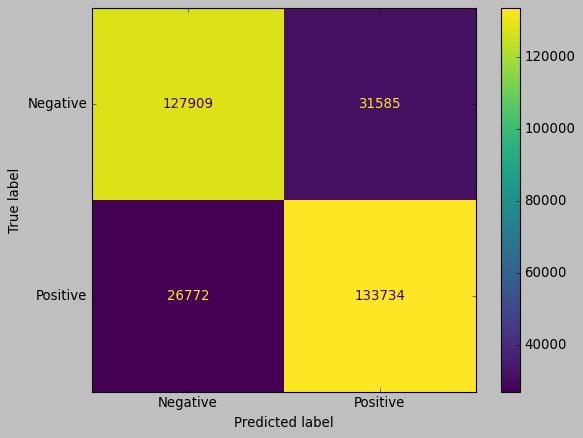

In [43]:
# Graphical representation for confusion matric
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

### Model 2: Bernoulli Naive Bayes Classifier

In [44]:
# Creating the model using on the training data set 

from sklearn.naive_bayes import BernoulliNB

#create model object
BNBmodel = BernoulliNB()

# fit model
BNBmodel.fit(x_train, y_train)

#predict model
BNBmodel_pred = BNBmodel.predict(x_test)

# check accuracy
BNBmodel_acc = accuracy_score(BNBmodel_pred, y_test)

#Print  test accuracy
print("Test accuracy: {:.2f}%".format(BNBmodel_acc*100))


print("confusion matrix : ")
confusion_matrix(BNBmodel_pred, y_test)

Test accuracy: 80.25%
confusion matrix : 


array([[130790,  34497],
       [ 28704, 126009]], dtype=int64)

In [45]:
print(classification_report(BNBmodel_pred, y_test))

              precision    recall  f1-score   support

    Negative       0.82      0.79      0.81    165287
    Positive       0.79      0.81      0.80    154713

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



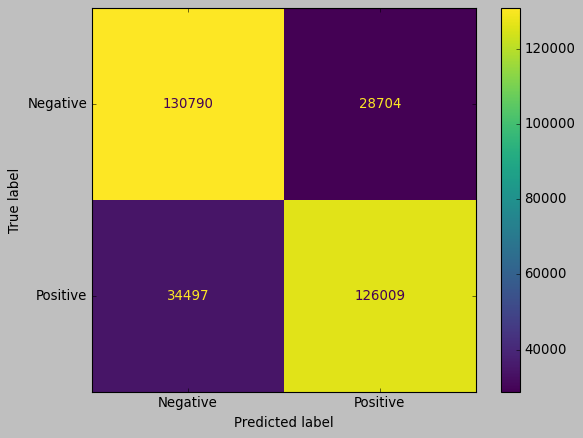

In [46]:
# Graphical representation for confusion matric
style.use('classic')
cm_1 = confusion_matrix(y_test,BNBmodel_pred , labels=BNBmodel.classes_)
disp_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels=BNBmodel.classes_)
disp_1.plot()

### Model 3: SVM (Support Vector Machine)

In [47]:
# Creating the model using on the training data set 

from sklearn.svm import LinearSVC

#create model object
SVCmodel = LinearSVC()

# fit model
SVCmodel.fit(x_train, y_train)

#predict model
SVCmodel_pred = SVCmodel.predict(x_test)

# check accuracy
SVC_acc  = accuracy_score(SVCmodel_pred, y_test)

#Print  test accuracy
print("Test accuracy: {:.2f}%".format(SVC_acc*100))

print("confusion matrix : " )
confusion_matrix(SVCmodel_pred, y_test)

Test accuracy: 82.18%
confusion matrix : 


array([[128723,  26266],
       [ 30771, 134240]], dtype=int64)

In [48]:
print(classification_report(SVCmodel_pred, y_test))

              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82    154989
    Positive       0.84      0.81      0.82    165011

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



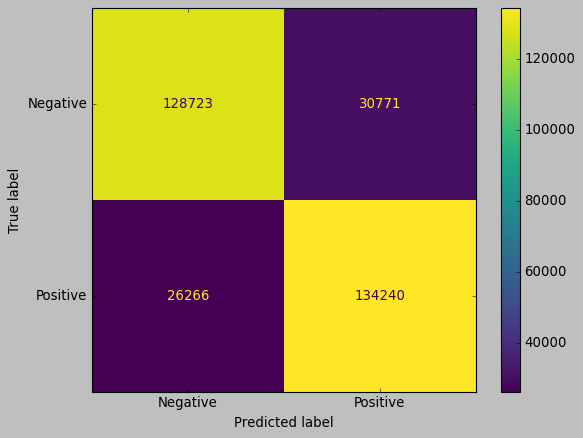

In [49]:
# Graphical representation for confusion matric
style.use('classic')
cm_2 = confusion_matrix(y_test,SVCmodel_pred , labels=SVCmodel.classes_)
disp_2 = ConfusionMatrixDisplay(confusion_matrix = cm_2, display_labels=SVCmodel.classes_)
disp_2.plot()

### Model Evaluation

**Upon evaluating all the models, we can conclude the following details i.e.**

- **Accuracy: As far as the accuracy of the model is concerned, SVM performs better than Logistic Regression, which in turn performs better than Bernoulli Naive Bayes.**

- **F1-score: The F1 Scores for class 0 and class 1 are :**

**(a) For class Negative: SVM (accuracy = 0.82) < Logistic Regression (accuracy = 0.81) = Bernoulli Naive Bayes (accuracy = 0.81)**

**(b) For class Positive: SVM (accuracy = 0.82) = Logistic Regression (accuracy = 0.82) < Bernoulli Naive Bayes (accuracy = 0.80)**

#### We, therefore, conclude that the Support Vector Machine(SVM) is the best model for the above-given dataset.